In [120]:
    import os
    import pandas as pd

    path= r"C:\Users\Lenovo\Desktop\DATA SETS"
    os.chdir(path)
    os.listdir(path)
    mall=pd.read_csv("Mall_Customers.csv")

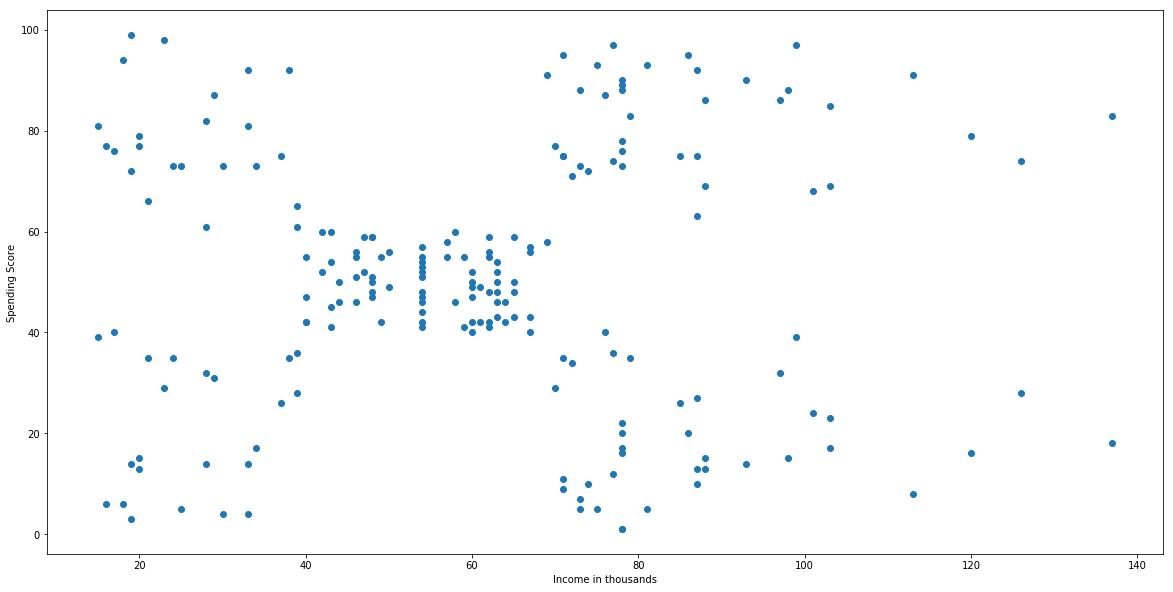

In [121]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(mall['Income'],mall['SpendingScore'],cmap="red")
plt.xlabel('Income in thousands')
plt.ylabel('Spending Score')
plt.show()

,CustomerID,Genre,Age,Income,SpendingScore,Cluster
0,1,Male,19,15,39,7
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,7


In [124]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [125]:
km=KMeans(n_clusters=5,random_state=0)
km.fit(mall[['Income','SpendingScore']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [126]:
print("The Centre of clusters are :/n",km.cluster_centers_)
print("Cluster labesls are :" , km.labels_)

The Centre of clusters are :/n [[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
Cluster labesls are : [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [127]:
X=mall['Income']
Y=mall['SpendingScore']

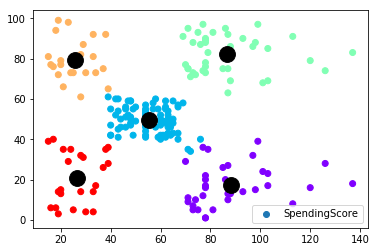

In [128]:
from matplotlib import pyplot as plt

plt.scatter(X,Y,c=km.labels_,cmap='rainbow')
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],c='black',s=250)
plt.legend()
plt.show()

In [129]:
mall['Cluster'] = km.labels_
mall.head(5)

,CustomerID,Genre,Age,Income,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# Elbow Method

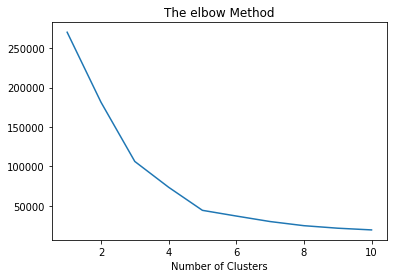

In [132]:
X = mall.iloc[:, [3,4]].values
ls = []
for i in range (1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    ls.append(km.inertia_)  #sum of squared distances of samples to theri closes
plt.plot(range(1,11),ls)
plt.title('The elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

In [155]:
km = KMeans(n_clusters = 5)
y_Kmeans =km.fit_predict(mall[['Income','SpendingScore']])

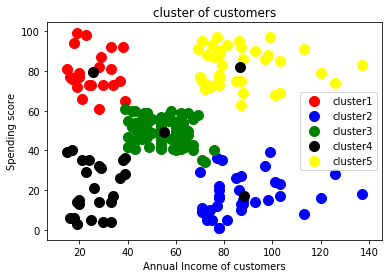

In [157]:
#Visualization the clusters

plt.scatter(X[y_Kmeans == 0,0], X[y_Kmeans == 0,1], s = 100, label='cluster1',c='red')
plt.scatter(X[y_Kmeans == 1,0], X[y_Kmeans == 1,1], s = 100, label='cluster2',c='blue')
plt.scatter(X[y_Kmeans == 2,0], X[y_Kmeans == 2,1], s = 100, label='cluster3',c='green')
plt.scatter(X[y_Kmeans == 3,0], X[y_Kmeans == 3,1], s = 100, label='cluster4',c='black')
plt.scatter(X[y_Kmeans == 4,0], X[y_Kmeans == 4,1], s = 100, label='cluster5',c='yellow')



plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],c='black',s=100)
plt.title("cluster of customers")
plt.xlabel('Annual Income of customers')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [158]:
mall['kmlabels'] = km.labels_
mall.head(5)

,CustomerID,Genre,Age,Income,SpendingScore,Cluster,kmlabels,hclabels,gender
0,1,Male,19,15,39,4,3,4,1
1,2,Male,21,15,81,3,0,3,1
2,3,Female,20,16,6,4,3,4,2
3,4,Female,23,16,77,3,0,3,2
4,5,Female,31,17,40,4,3,4,2


# Random Forest Classification

In [159]:
mall['gender'] =mall['Genre'].map( {'Male':1, 'Female':2})

In [160]:
mall.head()

,CustomerID,Genre,Age,Income,SpendingScore,Cluster,kmlabels,hclabels,gender
0,1,Male,19,15,39,4,3,4,1
1,2,Male,21,15,81,3,0,3,1
2,3,Female,20,16,6,4,3,4,2
3,4,Female,23,16,77,3,0,3,2
4,5,Female,31,17,40,4,3,4,2


In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x=mall[['Age','Income','SpendingScore']]
y=mall[['gender']]
#create the test/train split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.4,random_state=1)

In [162]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Income', 'SpendingScore', 'Cluster',
       'kmlabels', 'hclabels', 'gender'],
      dtype='object')

In [163]:
#Create the model and train
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
#Predict the results for test
test_pred=model.predict(x_test)

In [165]:
#test the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.5625

# Hierarchical Clustering

In [166]:
X = mall.iloc[:, [3,4]].values

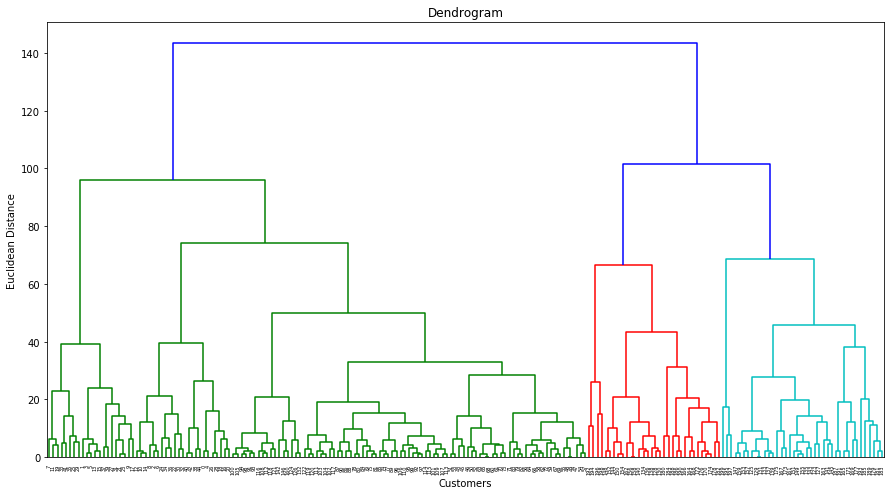

In [167]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X,method='complete'))
#sch .dendrogram(sch.linkage(X,method ='word')) #minimum variance method
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distance')
plt.show()


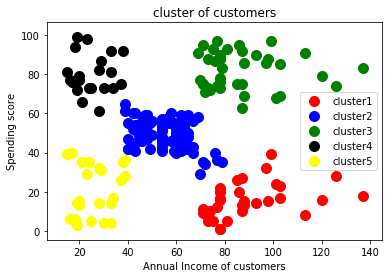

In [168]:
#fitting Hierarchical Clustering to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

#visualising the clusters
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, label='cluster1',c='red')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, label='cluster2',c='blue')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, label='cluster3',c='green')

plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s = 100, label='cluster4',c='black')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s = 100, label='cluster5',c='yellow')

plt.title("cluster of customers")
plt.xlabel('Annual Income of customers')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [170]:
mall['hclabels'] = hc.labels_
mall.head(5)

,CustomerID,Genre,Age,Income,SpendingScore,Cluster,kmlabels,hclabels,gender
0,1,Male,19,15,39,4,3,4,1
1,2,Male,21,15,81,3,0,3,1
2,3,Female,20,16,6,4,3,4,2
3,4,Female,23,16,77,3,0,3,2
4,5,Female,31,17,40,4,3,4,2


In [172]:
df=pd.read_csv("CC_DATA.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [175]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [176]:
df.shape

(8950, 18)